## Importing all necessary library's 

In [293]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [190]:
anz = pd.read_excel("C://Users//GENEMS-LENOVOIP//Downloads//jagannath//ANZ//ANZ.xlsx")

In [215]:
anz.head(2)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit


In [217]:
anz.to_csv('anz.csv',index=True)

In [218]:
cd

C:\Users\GENEMS-LENOVOIP


In [7]:
print(anz.shape) # shape function shows number of rows and columns of the Given data set

(12043, 23)


In [216]:
# checking the null values 
anz.isnull().sum()/len(anz)

status               0.000000
card_present_flag    0.000000
bpay_biller_code     0.926513
account              0.000000
currency             0.000000
long_lat             0.000000
txn_description      0.000000
merchant_id          0.359213
merchant_code        0.926679
first_name           0.000000
balance              0.000000
date                 0.000000
gender               0.000000
age                  0.000000
merchant_suburb      0.000000
merchant_state       0.000000
extraction           0.000000
amount               0.000000
transaction_id       0.000000
country              0.000000
customer_id          0.000000
merchant_long_lat    0.359213
movement             0.000000
dtype: float64

In [11]:
# merchant_id and bpay_biller_code has more then 90% of the null values we can drop these two columns

In [12]:
anz.card_present_flag.describe()

count    7717.000000
mean        0.802644
std         0.398029
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: card_present_flag, dtype: float64

In [211]:
anz.card_present_flag.fillna(value = 1.0,inplace = True)

In [212]:
anz.merchant_suburb.fillna(value='Melbourne',inplace=True)

In [213]:
anz.merchant_state.value_counts()

NSW    2169
VIC    2131
QLD    1556
WA     1100
SA      415
NT      205
ACT      73
TAS      68
Name: merchant_state, dtype: int64

In [214]:
anz.merchant_state.fillna(value = 'NSW', inplace = True)

In [248]:
an = anz.drop(['bpay_biller_code','merchant_code','merchant_id','merchant_long_lat'],axis=1)

In [43]:
an.head(2)

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,year
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,2018
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,2018


In [41]:
year = pd.DatetimeIndex(an.date).year

In [47]:
month = pd.DatetimeIndex(an.date).month

In [193]:
an['year'] = year

In [194]:
an['month'] = month

In [46]:
an.groupby(['year'])['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2018,12043.0,187.933588,592.599934,0.1,16.0,29.0,53.655,8835.98


In [52]:
an.groupby(['month','year'])['amount'].describe()

,,count,mean,std,min,25%,50%,75%,max
month,year,,,,,,,,
8,2018,3943.0,185.121867,579.376003,1.52,15.455,28.13,51.425,8835.98
9,2018,4013.0,182.045903,574.694422,0.10,16.090,29.00,54.400,8835.98
10,2018,4087.0,196.427323,621.857821,0.10,16.390,29.00,55.000,8835.98


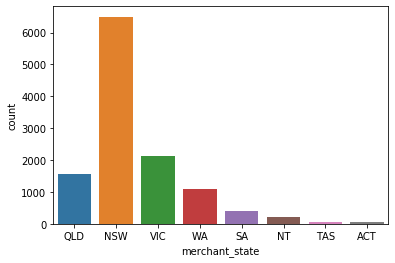

In [54]:
sns.countplot(an.merchant_state)

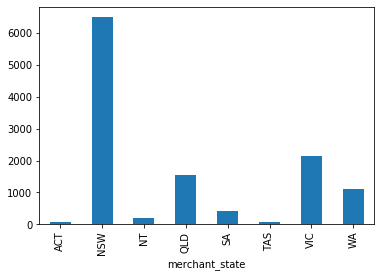

In [68]:
# which state contributing how much amount.
an.groupby('merchant_state')['amount'].count().plot.bar();

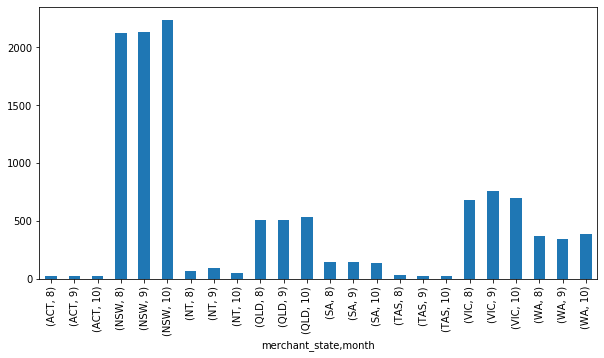

In [155]:
plt.figure(figsize=(10,5))
an.groupby(['merchant_state','month'])['amount'].count().plot.bar();

In [85]:
an.head(2)

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,year,month
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,2018,8
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,2018,8


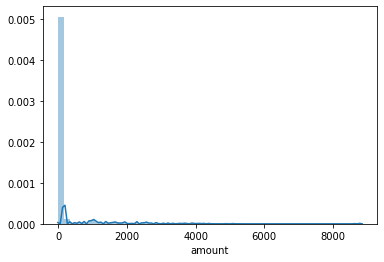

In [86]:
sns.distplot(an.amount) # distribution of amount

In [91]:
max = an['balance'].max
min = an['balance'].min()

In [98]:
# which account contributing the higest and lowest amount.
an[an['balance']==min]

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,year,month
792,authorized,1.0,ACC-1217063613,AUD,147.61 -37.82,POS,Kimberly,0.24,2018-08-07,F,...,Lara,VIC,2018-08-07T09:25:17.000+0000,14.73,38a2377f941d4504a96a8d6541d897d6,Australia,CUS-1739931018,debit,2018,8


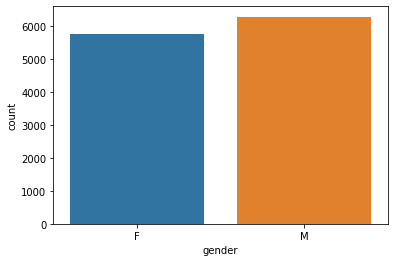

In [106]:
sns.countplot(an.gender)

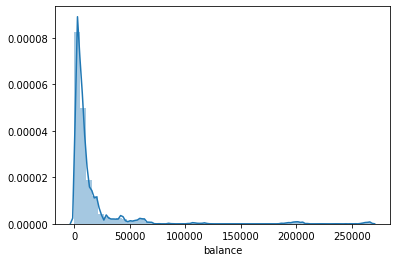

In [110]:
sns.distplot(an.balance)

## by observing the below distribution graph most of the balance lies between 0 to 50000

In [116]:
an.merchant_suburb.value_counts()  # value_counts shows the sum of records 

Melbourne          4581
Sydney              233
Southport            82
Brisbane City        79
Chatswood            55
                   ... 
Middleton Beach       1
Fulham Gardens        1
Strahan               1
Tottenham             1
Callala Bay           1
Name: merchant_suburb, Length: 1609, dtype: int64

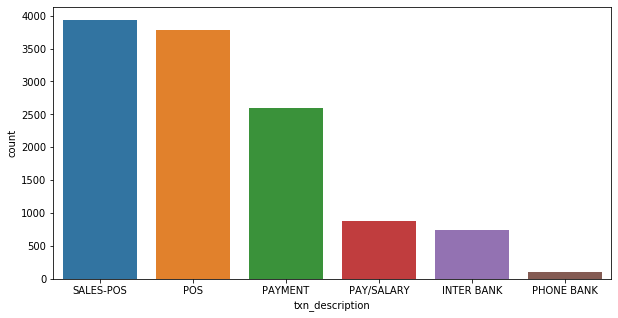

In [121]:
plt.figure(figsize=(10,5))
sns.countplot(an.txn_description,order = an.txn_description.value_counts().index)

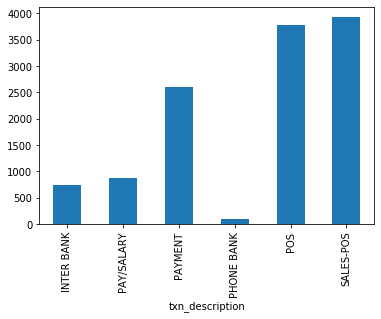

In [128]:
an.groupby(['txn_description'])['balance'].count().plot.bar();

In [130]:
an.movement.value_counts()

debit     11160
credit      883
Name: movement, dtype: int64

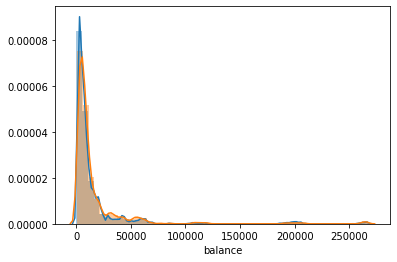

In [147]:
sns.distplot(an[an.movement=='debit']['balance'])
sns.distplot(an[an.movement=='credit']['balance'])

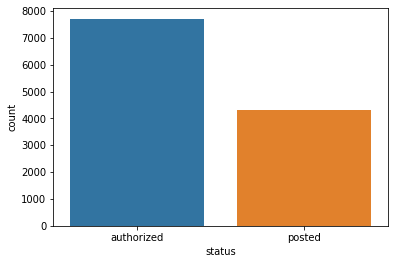

In [149]:
sns.countplot(an.status)

In [156]:
an.card_present_flag.value_counts()

1.0    10520
0.0     1523
Name: card_present_flag, dtype: int64

In [195]:
an.head(2)

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,...,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement,year,month
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,...,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit,2018,8
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,...,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit,2018,8


In [162]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()

In [163]:
an['movement'] = la.fit_transform(an['movement'])

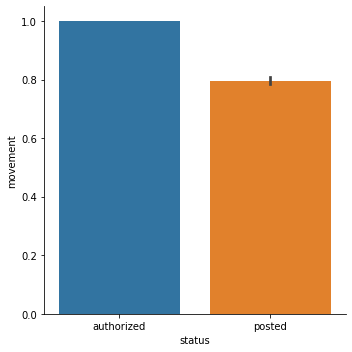

In [189]:
sns.catplot(x = 'status',y = 'movement',data = an,kind = 'bar')

In [198]:
an.groupby(['movement'])['amount'].describe()

## this clearly shows that statistical analysis of movement respective of balance

,count,mean,std,min,25%,50%,75%,max
movement,,,,,,,,
credit,883.0,1898.728029,1150.364621,576.0,1013.67,1626.48,2538.68,8835.98
debit,11160.0,52.572343,156.354143,0.1,15.19,26.93,45.00,7081.09


In [200]:
an.columns

Index(['status', 'card_present_flag', 'account', 'currency', 'long_lat',
       'txn_description', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'movement', 'year',
       'month'],
      dtype='object')

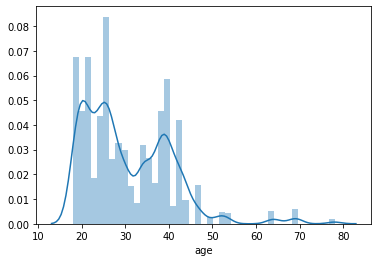

In [204]:
sns.distplot(an.age)

In [242]:
amount = an.groupby(['merchant_state'])['amount'].describe()
amount

,count,mean,std,min,25%,50%,75%,max
merchant_state,,,,,,,,
ACT,73.0,66.803836,201.821548,4.50,10.9500,22.910,33.4700,1348.47
NSW,2169.0,47.036316,146.858464,0.10,13.3100,22.530,40.7900,4233.00
NT,205.0,44.726293,138.170485,1.71,12.5200,17.810,31.1200,1285.09
QLD,1556.0,34.372397,218.024779,0.10,9.2875,14.700,25.8800,7081.09
SA,415.0,40.425470,87.115715,3.28,14.1500,22.120,35.9050,909.61
TAS,68.0,28.866618,26.782770,7.35,13.7150,22.080,29.0700,133.31
VIC,2131.0,41.099953,130.790309,0.10,14.0350,21.730,35.4750,3680.71
WA,1100.0,30.901873,72.522139,2.05,11.4300,18.365,28.7725,1692.56


## Things are Done 

1. Dealing with the null values
2. Analyzing the given data set
3. performing data visualization.


## Applying ML Regression Techniques

In [250]:
an.head(2)

,status,card_present_flag,account,currency,long_lat,txn_description,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,debit


In [255]:
newan = an.drop(['account','long_lat','date','extraction','transaction_id','customer_id','first_name'],axis = 1)

In [258]:
newan.head(2)

,status,card_present_flag,currency,txn_description,balance,gender,age,merchant_suburb,merchant_state,amount,country,movement
0,0,1.0,0,4,35.39,0,26,52,3,16.25,0,1
1,0,0.0,0,5,21.20,0,26,1380,1,14.19,0,1


In [257]:
## converting all categorical into numerical one because a machine can only understand numerical not text.

newan['status'] = la.fit_transform(newan['status'])
newan['currency'] = la.fit_transform(newan['currency'])
newan['txn_description'] = la.fit_transform(newan['txn_description'])
newan['gender'] = la.fit_transform(newan['gender'])
newan['merchant_suburb'] = la.fit_transform(newan['merchant_suburb'])
newan['merchant_state'] = la.fit_transform(newan['merchant_state'])
newan['country'] = la.fit_transform(newan['country'])
newan['movement'] = la.fit_transform(newan['movement'])

In [259]:
from sklearn.model_selection import train_test_split

In [260]:
## selecting the train and test dada
# selecting the dependant and indepandant variables
# x -> Independant variable
# y-> Dependant variable
x = newan.drop(['balance'],axis = 1)
y = newan.balance

In [262]:
# selecting my train and test size 
# test size = 30%
# train size = 70%
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.30 , random_state=100)

In [263]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [264]:
model = dtree.fit(xtrain,ytrain)

In [265]:
pre = model.predict(xtest)

In [266]:
pre

array([ 3412.02,  3076.11,  2297.67, ...,  2991.89,  2624.85, 41516.4 ])

In [267]:
from sklearn.metrics import accuracy_score,classification_report,r2_score

In [269]:
r2_score(ytest,pre)

0.7932998557630814

### Applying the RandomForest

In [270]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [271]:
modal = rf.fit(xtrain,ytrain)

In [272]:
predctions = modal.predict(xtest)

In [273]:
predctions

array([ 2705.2148    ,  2952.7299    ,  1705.3449    , ...,
        2229.6044    ,  2231.22640564, 23247.0561    ])

In [274]:
r2_score(ytest,predctions)

0.8558990917127368

In [275]:
rf.feature_importances_

array([0.01735295, 0.00543177, 0.        , 0.05200618, 0.09081324,
       0.47157394, 0.04068087, 0.12167731, 0.19881173, 0.        ,
       0.00165201])

In [285]:
nan = newan.drop(['balance'],axis = 1)

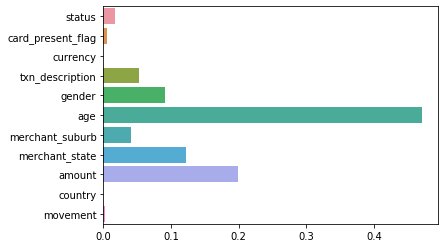

In [289]:
## below bar graph shows that feature importance of the parameters
sns.barplot(y = nan.columns,x=rf.feature_importances_)

In [305]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [314]:
## RMSE = Root mean squared error
# we are squaring the error because to minimise the error rate
rmse = np.sqrt(mean_squared_error(ytest,predctions))
mae = mean_absolute_error(ytest,predctions)

In [315]:
print(rmse)
print(mae)

11357.160925000571
5032.698987417896


In [326]:
a  = pd.DataFrame({'Acyual':ytest,'pred':predctions})
a

,Acyual,pred
4484,1155.04,2705.214800
11301,2964.74,2952.729900
8698,3061.97,1705.344900
9067,7784.85,5329.623800
11410,17452.00,12014.809171
...,...,...
10738,1214.04,1590.093000
11727,2527.02,1852.056200
9271,4856.80,2229.604400
7622,4672.22,2231.226406


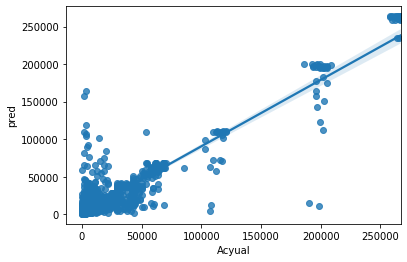

In [327]:
sns.regplot(a.Acyual,a.pred)